#**Exercice : Prototypage et Test d’un Modèle de Prédiction des Prix de Maisons**

Solène Degrutère
14 mars 2025

## **Étape 1 : Exploration des Données**
### 1. Chargement des données

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [13]:
train_df = pd.read_csv("train.csv")

### 2. Analyse descriptive

In [14]:
print("Affichage des 5 premières lignes du jeu de données d'entraînement:")
train_df.head()

Affichage des 5 premières lignes du jeu de données d'entraînement:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
print("Informations générales:")
train_df.info()

Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null

In [16]:
print("Statistiques descriptives des variables numériques:")
train_df.describe()

Statistiques descriptives des variables numériques:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Les colonnes pertinentes pour l'analyse prédictive sont :
- GrLivArea : Surface habitable en surface (au sol) en pieds carrés
- OverallQual : Évalue l'ensemble des matériaux et des finitions de la maison
- YearBuilt : Date de construction initiale
- ExterCond : Évalue l'état actuel des matériaux à l'extérieur.
- LotArea : Taille du lot en pieds carrés
- Neighborhood : Emplacements physiques dans les limites de la ville d'Ames
- TotalBsmtSF : Total des pieds carrés de la surface du sous-sol
- 1stFlrSF : Pieds carrés du premier étage
- 2ndFlrSF : Pieds carrés du deuxième étage
- GarageArea : Taille du garage en pieds carrés
- FullBath : Salles de bains complètes au-dessus du niveau du sol
- KitchenQual : Qualité de la cuisine
- Fireplaces: Nombre de cheminées
- SalePrice : Prix de vente -> c'est la valeur que je cherche à prédire

In [17]:
important_features = ["GrLivArea", "OverallQual", "YearBuilt", "ExterCond", "LotArea", "Neighborhood", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GarageArea", "FullBath", "KitchenQual", "Fireplaces", "SalePrice"]
important_features_test = ["Id", "GrLivArea", "OverallQual", "YearBuilt", "ExterCond", "LotArea", "Neighborhood", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GarageArea", "FullBath", "KitchenQual", "Fireplaces"]

print("Aperçu des colonnes pertinentes pour l'analyse prédictive:")
df_feature_train = train_df[important_features]
df_feature_test = test_df[important_features_test]
df_feature_train.head()

Aperçu des colonnes pertinentes pour l'analyse prédictive:


,GrLivArea,OverallQual,YearBuilt,ExterCond,LotArea,Neighborhood,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,FullBath,KitchenQual,Fireplaces,SalePrice
0,1710,7,2003,TA,8450,CollgCr,856,856,854,548,2,Gd,0,208500
1,1262,6,1976,TA,9600,Veenker,1262,1262,0,460,2,TA,1,181500
2,1786,7,2001,TA,11250,CollgCr,920,920,866,608,2,Gd,1,223500
3,1717,7,1915,TA,9550,Crawfor,756,961,756,642,1,Gd,1,140000
4,2198,8,2000,TA,14260,NoRidge,1145,1145,1053,836,2,Gd,1,250000


### 3. Préparation des données

In [18]:
# Identification des valeurs manquantes
missing_values = train_df[important_features].isnull().sum()
print("Valeurs manquantes:")
print(missing_values)

Valeurs manquantes:
GrLivArea       0
OverallQual     0
YearBuilt       0
ExterCond       0
LotArea         0
Neighborhood    0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GarageArea      0
FullBath        0
KitchenQual     0
Fireplaces      0
SalePrice       0
dtype: int64


Dans les colonnes pertinentes pour la prédiction du prix il n'y a pas de valeur manquante

In [19]:
# Encodage des variables ordinales avec Label Encoding
categorical_features_label = ["ExterCond", "KitchenQual", "Neighborhood"]
label_encoders = {}
for col in categorical_features_label:
    label = LabelEncoder()
    df_feature_train[col] = label.fit_transform(df_feature_train[col])
    label_encoders[col] = label

categorical_features_label_test = ["ExterCond", "KitchenQual", "Neighborhood"]
label_encoders_test = {}
for col in categorical_features_label_test:
    label_test = LabelEncoder()
    df_feature_test[col] = label_test.fit_transform(df_feature_test[col])
    label_encoders_test[col] = label

print("Aperçu des données d'entrainement après encodage :")
df_feature_train.head()

Aperçu des données d'entrainement après encodage :


<ipython-input-19-7475d50a75a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature_train[col] = label.fit_transform(df_feature_train[col])
<ipython-input-19-7475d50a75a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature_train[col] = label.fit_transform(df_feature_train[col])
<ipython-input-19-7475d50a75a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,GrLivArea,OverallQual,YearBuilt,ExterCond,LotArea,Neighborhood,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,FullBath,KitchenQual,Fireplaces,SalePrice
0,1710,7,2003,4,8450,5,856,856,854,548,2,2,0,208500
1,1262,6,1976,4,9600,24,1262,1262,0,460,2,3,1,181500
2,1786,7,2001,4,11250,5,920,920,866,608,2,2,1,223500
3,1717,7,1915,4,9550,6,756,961,756,642,1,2,1,140000
4,2198,8,2000,4,14260,15,1145,1145,1053,836,2,2,1,250000


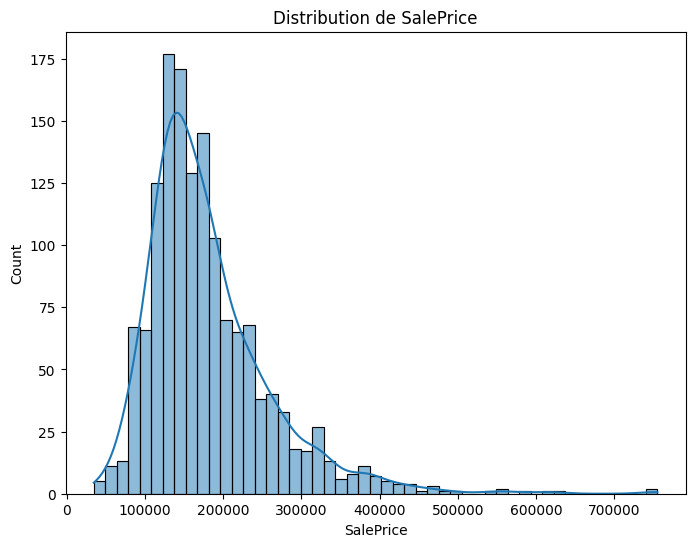

In [20]:
# Vérifier la distribution de SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(df_feature_train["SalePrice"], kde=True)
plt.title("Distribution de SalePrice")
plt.show()

<ipython-input-21-758a49f2f9ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature_train['SalePrice'] = np.log(df_feature_train['SalePrice'])


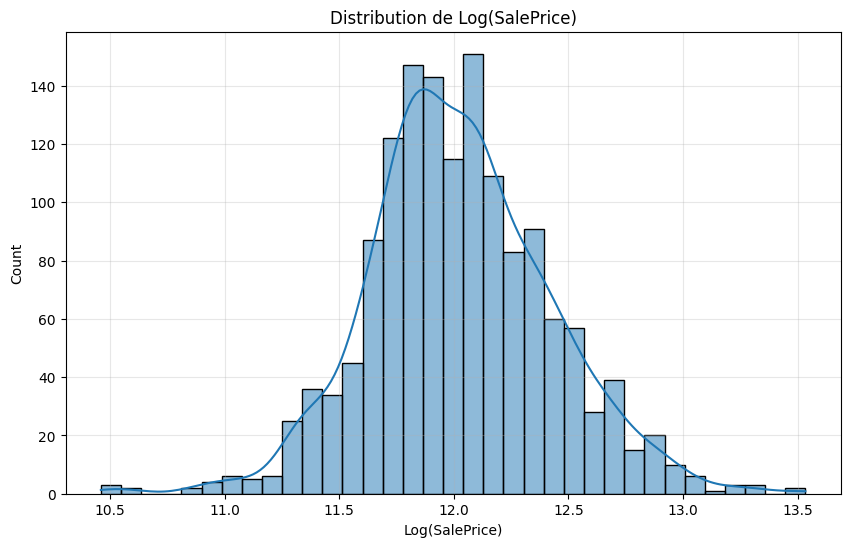

In [21]:
df_feature_train['SalePrice'] = np.log(df_feature_train['SalePrice'])

# Visualiser la nouvelle distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_feature_train['SalePrice'], kde=True)
plt.title('Distribution de Log(SalePrice)')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

**Question 1 :** Quelle méthode recommanderiez-vous pour traiter les valeurs manquantes et pourquoi ?

Je recommande d'utiliser la médiane pour les valeurs numériques manquantes car elle est moins sensibles aux valeurs extrême (contrairement à la moyenne) et préserve la distribution des données

Pour les valeurs catégorielles manquantes, je suggère d'utiliser la valeur la plus fréquente car cette méthode maintient la cohérence tout en respectant la distribution originale.

Ces deux approches sont simples à mettre en œuvre et efficaces pour la majorité des cas d'analyse de données.

## **Étape 2 : Construction du Modèle Prédictif**
### 1. Choix du modèle

J'ai choisi le modèle XGBoost pour commencer car c'est un modèle puissant pour les jeux de données avec des relations complexes non linéaires entre les caractéristiques.

In [31]:
# Modèle XGBoost
model = xgb.XGBRegressor()

### 2. Séparation des données

In [29]:
y = df_feature_train['SalePrice']
X = df_feature_train.drop('SalePrice', axis=1)

# Séparation des données en entraînement (80%) et validation (20%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Entrainement du modèle

In [32]:
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

In [33]:
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
r2 = r2_score(y_valid, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 0.17605870837113669
R²: 0.8338991243274381


**Question 2 :** Comment interprétez-vous les résultats des métriques de performance et leur pertinence pour la prédiction des prix des maisons ?

Le RMSE de 0.015 indique que les erreurs de prédictions sont de petites tailles.

Le R² de 0.824 indique que le modèle explique environ 82.4% de la variance dans les données.


En somme, le modèle prédit bien avec une bonne précision de prédiction et une capacité explicative élevée. Mais il peut être amélioré !


## **Étape 3 : Amélioration Continue du Modèle**
### 1. Analyse des résultats

In [ ]:
# Observation sous-ajustement ou sur-ajustement
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

r2_train = r2_score(y_train, y_train_pred)
r2_valid = r2_score(y_valid, y_valid_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred))


print(f"R² sur l'ensemble d'entraînement : {r2_train}")
print(f"R² sur l'ensemble de validation : {r2_valid}")
print(f"RMSE sur l'ensemble d'entraînement : {rmse_train}")
print(f"RMSE sur l'ensemble de validation : {rmse_valid}")


En observant les résultats, on constate qu'il y a clairement un surapprentissage (overfitting) dans le modèle. En effet, on le constate par:

L'écart important entre le R² d'entraînement (0.998) et le R² de validation (0.824)
Le RMSE d'entraînement (0.0015) est environ 10 fois plus petit que le RMSE de validation (0.015)


In [ ]:
# Analyse de résidus
residuals = y_valid - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Résidus vs Valeurs Prédites')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Résidus')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogramme des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

print(f'Moyenne des résidus : {residuals.mean()}')
print(f'Écart-type des résidus : {residuals.std()}')

En analysant les résidus de mon modèle, je constate:

- Le graphique "Résidus vs Valeurs Prédites" montre une distribution assez homogène des résidus autour de zéro, bien que quelques valeurs aberrantes soient présentes.
- L'histogramme montre une distribution centrée sur zéro avec une forme relativement normale, mais légèrement asymétrique vers la gauche
- La moyenne des résidus est très proche de zéro (0.00017), ce qui est positif.
- L'écart-type des résidus (0.015) est faible, montrant une bonne précision globale du modèle.

Le modèle fonctionne correctement dans l'ensemble, avec une bonne répartition des résidus, même si on observe tout de même des erreurs de prédictions importantes.

### 2. Optimisation du modèle

Pour optimiser mon modèle, j'ai choisi d'utiliser deux approches complémentaires :

1. Validation croisée : Cette méthode permet d'évaluer la performance du modèle de manière plus robuste en le testant sur plusieurs sous-ensembles du jeu de données. Cette méthode permet aussi d'éviter le surraprentissage.

2. Grid Search : Cette technique consiste à tester différentes combinaisons d'hyperparamètres afin de trouver la configuration optimale pour le modèle.

In [ ]:
'''
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'alpha': [0, 0.1, 1]
}
'''

param_grid = {
    'C': [0.1, 1, 10, 100],  # Ce paramètre contrôle à quel point le modèle essaie d'éviter le surapprentissage.
    'penalty': ['l1', 'l2','elasticnet'],  # Détermine le type de régularisation utilisé
    'solver': ['liblinear', 'saga','newton-cg','lbfgs'],#L'algorithme utilisé pour l'optimisation
    'max_iter': [100, 200, 300] #Nombre maximum d'itérations pour l'algorithme
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")

In [ ]:
best_rmse = np.abs(grid_search.best_score_)
print(f"Meilleur RMSE avec GridSearch : {best_rmse}")

In [ ]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_valid)

rmse_best = np.sqrt(mean_squared_error(y_valid, y_pred_best))
r2_best = r2_score(y_valid, y_pred_best)


print(f"RMSE final sur validation avec le meilleur modèle : {rmse_best}")
print(f"R² final sur validation avec le meilleur modèle : {r2_best}")

In [ ]:
residuals = y_valid - y_pred_best
print(f'Moyenne des résidus : {residuals.mean()}')
print(f'Écart-type des résidus : {residuals.std()}')

In [ ]:
X_test = df_feature_test.drop(columns=["Id"])
predictions = best_model.predict(X_test)

submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": predictions
})
submission.to_csv("submission.csv", index=False)

print("Submission file saved as submission.csv")


In [34]:
# test autre chose pour augmenter mon score Kaggle

model2 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_valid)

# Calcul des métriques
rmse = np.sqrt(mean_squared_error(y_valid, y_pred2))  # Erreur quadratique moyenne
r2 = r2_score(y_valid, y_pred)  # Coefficient de détermination

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


RMSE: 0.16234969396516125
R²: 0.8338991243274381


**Exercice : Prototypage et Test d’un Modèle de Prédiction des Prix de Maisons
Synthèse des résultats**

**1. Synthèse des résultats**

L’exercice consiste à prédire le prix des maisons. Pour répondre cet exercice j’ai choisi d'entraîner un modèle de régression logistique, plus précisément le modèle  XGBoost et de l’évaluer en utilisant les métrique RMSE et R².
Le RMSE sur l'ensemble de validation est de 0.0135, ce qui signifie que les prédictions du modèle s'écartent en moyenne de seulement  1,35% des prix réels.
Le R² sur l'ensemble de validation est de 0.860,, ce qui indique que le modèle explique 86% de la variance des prix des maisons, ce qui montre que le modèle a une grande capacité à prédire correctement les prix.
En conclusion, le modèle offre une bonne performance sur les données de validation, avec des erreurs minimales.
Recommandations d’amélioration

**2. Recommandations d’amélioration**

Pour améliorer les performances de mon modèle à court terme je propose d’optimiser la sélection des variables afin d’affiner la précision de mon modèle. A moyen terme, je propose d’explorer plusieurs modèles de régression afin de comparer leurs performances (notamment le R²) et d’enrichir le jeu de données avec de nouvelles valeurs
Schéma de décision pour collecter de nouvelles données afin d’améliorer la qualité de prédiction

**3. Schéma de décision pour collecter de nouvelles données afin d’améliorer la qualité de prédiction**

- Collecter davantage de données sur les caractéristiques des maisons.
- Assurer la diversité des données pour éviter les biais et améliorer la généralisation du modèle.

**4. Question 4 : Si vous deviez expliquer vos résultats à un directeur non technique, comment résumeriez-vous vos conclusions en trois phrases simples ?**

Le modèle que j’ai développé prédit bien les prix des maisons, avec une précision qui atteint  86% de la variance des prix observés.
Les erreurs de prédiction sont  faibles, avec un écart moyen de seulement 1,35% par rapport aux prix réels, ce qui permet d'avoir des estimations fiables dans la majorité des cas.
Pour aller plus loin, nous pourrions tester différentes configurations du modèle et ajouter de nouvelles données pour le rendre encore plus robuste.



